In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from itertools import combinations
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.ensemble import RandomForestRegressor

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ReelView = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/ReelView.csv')
movies_metadata = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/movies_metadata.csv')
keywords = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/keywords.csv')
links = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/links.csv')
links_small = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/links_small.csv')
ratings_small = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/ratings_small.csv')
box_office = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/boxoffice.csv')
BestBooks = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/books_1.Best_Books_Ever.csv')
best_selling_books = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/best-selling-books.csv')
author = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/author_info.csv')
final_df = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/final_df.csv')

<ipython-input-6-3bf45f639658>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('/content/drive/MyDrive/data 144 final project/csv files/movies_metadata.csv')


In [ ]:
final_df

,title,Rating,Pages,Total Ratings,Percent Liked,Nr Awards,Author Workcount,Author Fancount,Movie Success,year,...,Mystery,Mystery Thriller,Nonfiction,Novels,Paranormal,Romance,Science Fiction,Suspense,Thriller,Young Adult
0,The Hunger Games,4.33,374.0,6376780,96.0,41,32.0,81311.0,0.580000,2008,...,0,0,0,0,0,1,1,0,0,1
1,Harry Potter and the Order of the Phoenix,4.50,870.0,2507623,98.0,9,242.0,209174.0,0.963333,2003,...,0,0,0,0,0,0,0,0,0,1
2,The Book Thief,4.37,552.0,1834276,96.0,20,16.0,33743.0,0.806667,2005,...,0,0,0,0,0,0,0,0,0,1
3,The Hitchhiker's Guide to the Galaxy,4.22,193.0,1436325,94.0,1,103.0,19029.0,0.756667,1979,...,0,0,0,1,0,0,1,0,0,0
4,The Da Vinci Code,3.86,489.0,1933446,89.0,9,76.0,81601.0,0.826667,2003,...,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,Risk,3.53,176.0,345,88.0,1,30.0,110.0,0.346667,2009,...,1,0,0,0,0,0,0,0,1,0
809,Savannah,4.17,608.0,2007,95.0,1,56.0,134.0,0.166667,1983,...,0,0,0,0,0,1,0,0,0,0
810,Last Orders,3.68,352.0,12451,89.0,4,41.0,429.0,0.303333,1996,...,0,0,0,1,0,0,0,0,0,0
811,The Wanderers,3.90,320.0,1640,94.0,1,87.0,614.0,0.413333,1974,...,1,0,0,1,0,0,0,0,0,0


**Book Datasets**
1.   **BestBooks**: This dataset provides comprehensive information about 52478 books on Goodreads' Best Books Ever list, including ratings, genres, awards, and more
2.   **best_selling_books**: This dataset contains lists of best-selling books and book series in any language.
3. **author**: This dataset contains information on authors

**Movie Datasets**
1.   **ReelView**: movie reviews from ReelView
2.   **movies_metadata**: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.
3. **keywords**: Contains the movie plot keywords for our MovieLens movies
4. **links**: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.
5. **links_small**: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.
6. **ratings_small**: The subset of 100,000 ratings from 700 users on 9,000 movies.


In [ ]:
#adding a number of awards column into BestBooks dataframe
#dropping duplicates of the same book and movie
#adding suffix to each frame so we can keep track on what columns are about the book and what about the movie
BestBooks['award list'] = BestBooks['awards'].str.split(',')
BestBooks['num book awards'] = BestBooks['award list'].str.len()

BestBooks = BestBooks.drop_duplicates(subset='title')
movies_metadata = movies_metadata.drop_duplicates(subset='title')

BestBooks.columns = ['book_' + col if col != 'title' else col for col in BestBooks.columns]
movies_metadata.columns = ['movie_' + col if col != 'title' else col for col in movies_metadata.columns]

In [ ]:
#merging the books and movies
#removing all columns that are not good for our model
#replace NaN values with appropriate values
#making sure the publish date type is coherent
#dropped all NaN rows since they were only 16 of them

df = pd.merge(BestBooks, movies_metadata, on='title')

df['book_firstPublishDate'] = df['book_firstPublishDate'].fillna(df['book_publishDate'])
df['book_pages'] = df['book_pages'].str.extract('(\d+)')
df['book_pages'] = df['book_pages'].fillna(np.median(df['book_pages'].dropna().astype(int)))
df['book_publish_date'] = pd.to_datetime(df['book_firstPublishDate'], errors='coerce', exact=False)

df = df.drop(columns=['book_bookId', 'book_series', 'book_description', 'book_isbn', 'book_language', 'book_edition',
                      'movie_production_countries', 'book_characters', 'book_bookFormat', 'movie_original_title',
                      'movie_spoken_languages', 'movie_status', 'movie_video', 'movie_tagline', 'movie_overview',
                      'movie_poster_path', 'movie_production_companies', 'movie_homepage', 'movie_id',
                      'book_coverImg', 'book_bbeScore', 'book_bbeVotes', 'book_price', 'book_award list',
                      'movie_adult', 'movie_belongs_to_collection', 'movie_original_language', 'movie_popularity',
                      'movie_runtime', 'book_publisher', 'book_publishDate', 'book_firstPublishDate'], axis=1)
df = df.dropna()

In [ ]:
#Making sure the book came out before the movie
df = df[df['movie_release_date'] > df['book_publish_date'] + pd.DateOffset(years=1)]

In [ ]:
#adding lifetime gross and studio
df = pd.merge(df, box_office[['title', 'studio' , 'lifetime_gross']], on='title', how='left')

In [ ]:
df = df.dropna()

In [ ]:
#adding author information such as workcount, fancount and gender

df['book_author'] = df['book_author'].str.lower()
df['book_author'] = df['book_author'].str.split(',').str[0]
df['book_author'] = df['book_author'].str.replace(r"\(.*\)", "", regex=True).str.strip()
df['book_author'] = df['book_author'].astype(str)

author['name'] = author['name'].str.lower()
author['name'] = author['name'].str.split(',').str[0]
author['name'] = author['name'].str.replace(r"\(.*\)", "", regex=True).str.strip()
author['name'] = author['name'].astype(str)

df = pd.merge(df, author[['name', 'workcount', 'fan_count']], left_on='book_author', right_on='name', how='left')

In [ ]:
#filling NaN values

df['author_workcount'] = df['workcount'].fillna(df['workcount'].mean())
df['author_fan_count'] = df['fan_count'].fillna(df['fan_count'].mean())
df.drop(columns=['name', 'workcount', 'fan_count'], axis=1)
df

,title,book_author,book_rating,book_genres,book_pages,book_awards,book_numRatings,book_ratingsByStars,book_likedPercent,book_setting,...,movie_vote_average,movie_vote_count,book_publish_date,studio,lifetime_gross,name,workcount,fan_count,author_workcount,author_fan_count
0,The Hunger Games,suzanne collins,4.33,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",...,6.9,9634.0,2008-09-14,LGF,408010692.0,suzanne collins,32.0,81311.0,32.0,81311.0
1,Harry Potter and the Order of the Phoenix,j.k. rowling,4.50,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,...,7.4,5633.0,2003-06-21,WB,292004738.0,j.k. rowling,242.0,209174.0,242.0,209174.0
2,The Book Thief,markus zusak,4.37,"['Historical Fiction', 'Fiction', 'Young Adult...",552,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",...,7.4,1528.0,2005-09-01,Fox,21488481.0,markus zusak,16.0,33743.0,16.0,33743.0
3,The Hitchhiker's Guide to the Galaxy,douglas adams,4.22,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",193,[],1436325,"['725771', '420864', '199846', '58326', '31518']",94.0,[],...,6.6,1340.0,1979-10-12,BV,51085416.0,douglas adams,103.0,19029.0,103.0,19029.0
4,The Da Vinci Code,dan brown,3.86,"['Fiction', 'Mystery', 'Thriller', 'Suspense',...",489,['British Book Award for Book of the Year (200...,1933446,"['645308', '667657', '399278', '142103', '79100']",89.0,"['Paris (France)', 'London, England', 'France'...",...,6.5,2773.0,2003-03-18,Sony,217536138.0,dan brown,76.0,81601.0,76.0,81601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,Risk,colin harrison,3.53,"['Mystery', 'Fiction', 'Crime', 'Thriller']",176,[],345,"['52', '126', '124', '39', '4']",88.0,"['New York City, New York (United States)']",...,6.9,10.0,2009-01-01,Neon,200219.0,colin harrison,30.0,110.0,30.0,110.0
817,Savannah,eugenia price,4.17,"['Historical Fiction', 'Fiction', 'Romance', '...",608,[],2007,"['921', '650', '329', '77', '30']",95.0,"['Savannah, Georgia (United States)', 'Georgia...",...,5.9,7.0,1983-01-01,KE,37240.0,eugenia price,56.0,134.0,56.0,134.0
818,Last Orders,graham swift,3.68,"['Fiction', 'British Literature', 'Literature'...",352,"['Booker Prize (1996)', 'James Tait Black Memo...",12451,"['2684', '4760', '3632', '1033', '342']",89.0,[],...,6.0,22.0,1996-01-29,SPC,2329631.0,graham swift,41.0,429.0,41.0,429.0
819,The Wanderers,richard price,3.90,"['Fiction', 'Crime', 'New York', 'Novels', 'Li...",320.0,[],1640,"['452', '688', '406', '74', '20']",94.0,[],...,7.2,55.0,1974-01-01,Orion,14492.0,richard price,87.0,614.0,87.0,614.0


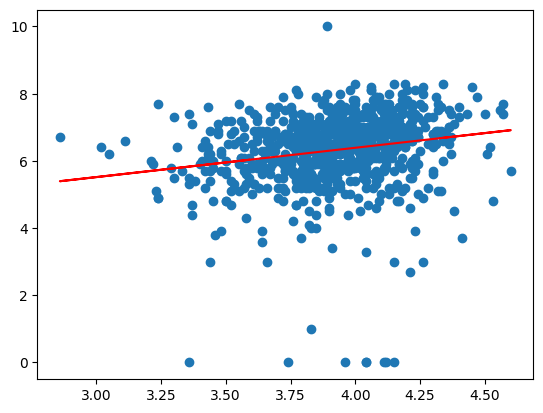

In [ ]:
#trying a baseline model of predicting average movie rating from book rating
X = df['book_rating'].values.reshape(-1, 1)
Y = df['movie_vote_average'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X,Y)
df['predicted movie rating'] = model.predict(X)
Y_pred = df['predicted movie rating'].values.reshape(-1, 1)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
#checking the quantiles .01 through 1 of numerical columns
df.quantile(np.arange(.01, 1.01, .01))

<ipython-input-53-55a7ff0ffcf2>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(np.arange(.01, 1.01, .01))


,book_rating,book_numRatings,book_likedPercent,book_num book awards,movie_revenue,movie_vote_average,movie_vote_count,lifetime_gross,workcount,fan_count,author_workcount,author_fan_count,predicted movie rating
0.01,3.240,98.8,76.0,1.0,0.000000e+00,1.34,1.0,2508.4,2.0,6.94,2.0,7.0,5.726436
0.02,3.360,194.8,78.0,1.0,0.000000e+00,3.64,2.0,3799.6,4.0,14.88,4.0,16.2,5.831240
0.03,3.410,259.4,80.0,1.0,0.000000e+00,4.06,3.0,6237.2,5.0,27.82,5.0,29.8,5.874908
0.04,3.430,344.6,82.0,1.0,0.000000e+00,4.50,3.0,9064.4,6.0,37.76,6.0,38.0,5.892375
0.05,3.450,552.0,83.0,1.0,0.000000e+00,4.70,4.0,13769.0,6.7,42.00,7.0,43.0,5.909843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.96,4.320,1056196.0,97.0,9.0,3.516052e+08,7.80,3240.4,155978063.8,1304.0,204916.00,1128.0,204916.0,6.669668
0.97,4.340,1334321.6,97.0,11.0,4.013015e+08,7.90,4446.0,172942181.0,1653.0,226991.64,1653.0,217317.0,6.687135
0.98,4.370,1814587.2,98.0,13.0,4.963974e+08,8.00,5297.8,217563193.8,1653.0,709826.00,1653.0,709826.0,6.713336
0.99,4.466,2435121.6,98.0,17.8,6.885576e+08,8.10,6023.0,268714036.4,1900.1,709826.00,1871.0,709826.0,6.797179


In [ ]:
#creating a column with the quantile for each value in the numerical columns
col_names = df.quantile(np.arange(.01, 1.01, .01)).columns
quantiles = df.quantile(np.arange(0.01, 1.01, 0.01))
# Iterate through columns
for col in col_names:
    success = []
    # Iterate through elements in the column
    for a in df[col].values:
        # Find the index of the first quantile where the element is smaller
        index = (quantiles[col] > a).idxmax()
        success.append(index)
    # Create a new column with success values
    df['success_' + col] = success

<ipython-input-54-3d27fe7da933>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  col_names = df.quantile(np.arange(.01, 1.01, .01)).columns
<ipython-input-54-3d27fe7da933>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = df.quantile(np.arange(0.01, 1.01, 0.01))


In [ ]:
#making an average success metric of .01 through 1
book_success_cols = ['success_book_rating',
       'success_book_numRatings', 'success_book_likedPercent',
       'success_book_num book awards','success_author_fan_count',
                     'success_workcount',
       'success_author_workcount', 'success_fan_count']

#removing success_movie_revenue since there are lots of 0s
movie_success_cols = ['success_movie_vote_average', 'success_movie_vote_count',
       'success_lifetime_gross']
#removing average vote of 0 (8 movies)
df = df[df['movie_vote_average']!=0]

#removing movies with no votes (8 movies)
df = df[df['movie_vote_count']!=0]

df['avg_book_success'] = df[book_success_cols].mean(axis=1)
df['avg_movie_success'] = df[movie_success_cols].mean(axis=1)
df

,title,book_author,book_rating,book_genres,book_pages,book_awards,book_numRatings,book_ratingsByStars,book_likedPercent,book_setting,...,success_fan_count,success_author_workcount,success_author_fan_count,success_predicted movie rating,avg_book_success,avg_movie_success,predicted avg movie success,book avg sig,predicted avg movie success 2,final combined prediction
0,The Hunger Games,suzanne collins,4.33,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",...,0.94,0.30,0.94,0.97,0.55125,0.580000,0.520200,0.640000,0.565554,0.07
1,Harry Potter and the Order of the Phoenix,j.k. rowling,4.50,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,...,0.97,0.88,0.97,1.00,0.95875,0.963333,0.654586,0.990000,0.689028,0.78
2,The Book Thief,markus zusak,4.37,"['Historical Fiction', 'Fiction', 'Young Adult...",552,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",...,0.91,0.15,0.91,0.99,0.75500,0.806667,0.587393,0.963333,0.679620,0.81
3,The Hitchhiker's Guide to the Galaxy,douglas adams,4.22,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...",193,[],1436325,"['725771', '420864', '199846', '58326', '31518']",94.0,[],...,0.85,0.64,0.83,0.92,0.78875,0.756667,0.598523,0.916667,0.663157,0.66
4,The Da Vinci Code,dan brown,3.86,"['Fiction', 'Mystery', 'Thriller', 'Suspense',...",489,['British Book Award for Book of the Year (200...,1933446,"['645308', '667657', '399278', '142103', '79100']",89.0,"['Paris (France)', 'London, England', 'France'...",...,0.94,0.56,0.94,0.38,0.70000,0.826667,0.569255,0.770000,0.611416,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,Risk,colin harrison,3.53,"['Mystery', 'Fiction', 'Crime', 'Thriller']",176,[],345,"['52', '126', '124', '39', '4']",88.0,"['New York City, New York (United States)']",...,0.11,0.28,0.11,0.08,0.22625,0.346667,0.413022,0.080000,0.367996,0.33
817,Savannah,eugenia price,4.17,"['Historical Fiction', 'Fiction', 'Romance', '...",608,[],2007,"['921', '650', '329', '77', '30']",95.0,"['Savannah, Georgia (United States)', 'Georgia...",...,0.13,0.46,0.13,0.86,0.46875,0.166667,0.492993,0.376667,0.472655,0.49
818,Last Orders,graham swift,3.68,"['Fiction', 'British Literature', 'Literature'...",352,"['Booker Prize (1996)', 'James Tait Black Memo...",12451,"['2684', '4760', '3632', '1033', '342']",89.0,[],...,0.25,0.37,0.25,0.16,0.36750,0.303333,0.459603,0.276667,0.437377,0.51
819,The Wanderers,richard price,3.90,"['Fiction', 'Crime', 'New York', 'Novels', 'Li...",320.0,[],1640,"['452', '688', '406', '74', '20']",94.0,[],...,0.31,0.59,0.30,0.45,0.47625,0.413333,0.495467,0.293333,0.443256,0.40


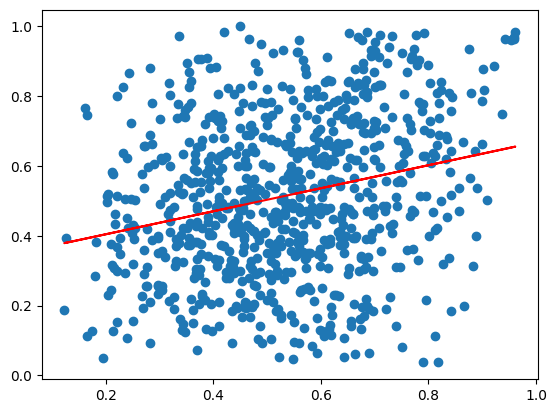

In [ ]:
#making a simple linear regression model to predict average movie success based on average book success
X = df['avg_book_success'].values.reshape(-1, 1)
Y = df['avg_movie_success'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X,Y)
df['predicted avg movie success'] = model.predict(X)
Y_pred = df['predicted avg movie success'].values.reshape(-1, 1)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
model.score(X,Y), model.coef_
plt.show()

In [ ]:
book_success_cols
#making a model based on the most significant features
X = df[book_success_cols]
X = sm.add_constant(X)
Y = df['avg_movie_success']
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      avg_movie_success   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     27.05
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           2.61e-37
Time:                        22:09:38   Log-Likelihood:                 154.09
No. Observations:                 813   AIC:                            -290.2
Df Residuals:                     804   BIC:                            -247.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3091      0.066      4.690      0.000       0.180       0.439
success_book_rating              0.1185      0.048      2.469      0.014       0.024       0.213
success_book_numRatings          0.3648      0.034     10.683      0.000       0.298       0.432
success_book_likedPercent        0.0333      0.046      0.725      0.469      -0.057       0.124
success_book_num book awards     0.0230      0.090      0.256      0.798      -0.154       0.200
success_author_fan_count         1.0006      0.603      1.660      0.097      -0.183       2.184
success_workcount                1.0125      0.626      1.617      0.106      -0.217       2.242
success_author_workcount        -1.0446      0.629     -1.661      0.097      -2.279       0.190
success_fan_count               -1.1253      0.597     -1.884      0.060      -2.297       0.047
==============================================================================
Omnibus:                       11.456   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.160
Skew:                          -0.031   Prob(JB):                       0.0279
Kurtosis:                       2.544   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#making a model based on the most significant features with sig level = 10%
df['book avg sig'] = df[['success_book_rating','success_book_numRatings',
                         'success_author_fan_count',
       'success_author_workcount', 'success_fan_count']].mean(axis=1)
X = df[['success_book_rating','success_book_numRatings',
                         'success_author_fan_count',
       'success_author_workcount', 'success_fan_count']]
X = sm.add_constant(X)
Y = df['avg_movie_success']
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      avg_movie_success   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     42.68
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           4.51e-39
Time:                        22:10:15   Log-Likelihood:                 152.57
No. Observations:                 813   AIC:                            -293.1
Df Residuals:                     807   BIC:                            -264.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3330      0.020     16.698      0.000       0.294       0.372
success_book_rating          0.1476      0.025      5.881      0.000       0.098       0.197
success_book_numRatings      0.3605      0.030     11.840      0.000       0.301       0.420
success_author_fan_count     0.0256      0.050      0.507      0.612      -0.073       0.125
success_author_workcount    -0.0270      0.027     -0.991      0.322      -0.081       0.026
success_fan_count           -0.1594      0.049     -3.265      0.001      -0.255      -0.064
==============================================================================
Omnibus:                       12.091   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.451
Skew:                          -0.032   Prob(JB):                       0.0241
Kurtosis:                       2.535   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#making another model based on the last with a significance level of 10%
df['book avg sig'] = df[['success_book_rating','success_book_numRatings', 'success_fan_count']].mean(axis=1)
X = df[['success_book_rating','success_book_numRatings', 'success_fan_count']]
X = sm.add_constant(X)
Y = df['avg_movie_success']
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      avg_movie_success   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     70.89
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.04e-40
Time:                        22:10:17   Log-Likelihood:                 152.06
No. Observations:                 813   AIC:                            -296.1
Df Residuals:                     809   BIC:                            -277.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3258      0.018     18.237      0.000       0.291       0.361
success_book_rating         0.1463      0.025      5.842      0.000       0.097       0.195
success_book_numRatings     0.3616      0.030     11.925      0.000       0.302       0.421
success_fan_count          -0.1465      0.029     -4.978      0.000      -0.204      -0.089
==============================================================================
Omnibus:                       12.226   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.563
Skew:                          -0.041   Prob(JB):                       0.0228
Kurtosis:                       2.535   Cond. No.                         7.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

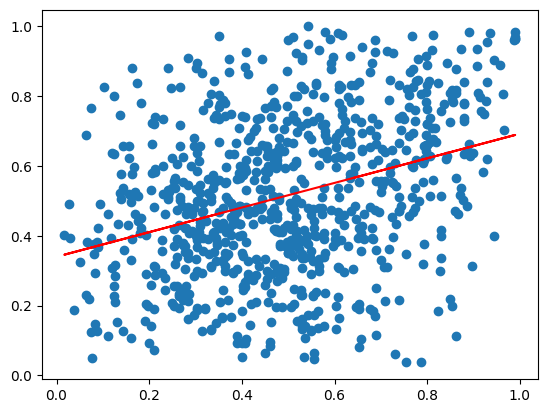

In [ ]:
#making a simple linear regression model based on the average of the most significant features
X = df[['success_book_rating','success_book_numRatings','success_fan_count']].mean(axis=1).values.reshape(-1, 1)
Y = df['avg_movie_success'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X,Y)

df['predicted avg movie success 2'] = model.predict(X)
Y_pred = df['predicted avg movie success 2'].values.reshape(-1, 1)
plt.scatter(X, Y)
model.score(X,Y), model.coef_
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
#running all combinations of features with several splits to see which produce the lowest MSE
all_features = ['success_book_rating','success_book_num book awards',\
                'success_book_numRatings', 'success_book_likedPercent', \
                'success_author_fan_count', 'avg_book_success', 'book avg sig',
                'success_workcount','success_author_workcount', 'success_fan_count']

feature_combinations = []
for r in range(1, len(all_features) + 1):
    feature_combinations.extend(combinations(all_features, r))

top_features = []
for i in range(100):
  train, test = train_test_split(df, test_size=0.3)
  results = {}
  for features in feature_combinations:
    x_train=train[list(features)]
    y_train=train['avg_movie_success']
    x_test=test[list(features)]
    y_test=test['avg_movie_success']
    model = sm.OLS(y_train, x_train).fit()
    y_pred = model.predict(x_test)
    mse_val = mean_squared_error(y_test, y_pred)
    results[features] = mse_val

  sorted_dict = sorted(results.items(), key=lambda x:x[1])
  sorted_results = dict(sorted_dict)
  features_only = list(sorted_results.keys())
  top_5_features = features_only[0:5]

  top_features.extend(top_5_features)

counter = Counter(top_features)
most_common = counter.most_common()
top_5_feature_combos = [
    [str(item) for item in most_common[0][0]],
    [str(item) for item in most_common[1][0]],
    [str(item) for item in most_common[2][0]],
    [str(item) for item in most_common[3][0]],
    [str(item) for item in most_common[4][0]]
]
top_10_feature_combos = [
    [str(item) for item in most_common[0][0]],
    [str(item) for item in most_common[1][0]],
    [str(item) for item in most_common[2][0]],
    [str(item) for item in most_common[3][0]],
    [str(item) for item in most_common[4][0]],
    [str(item) for item in most_common[5][0]],
    [str(item) for item in most_common[6][0]],
    [str(item) for item in most_common[7][0]],
    [str(item) for item in most_common[8][0]],
    [str(item) for item in most_common[9][0]]
]
top_5_feature_combos

[['success_book_num book awards',
  'success_book_numRatings',
  'success_book_likedPercent',
  'avg_book_success',
  'book avg sig',
  'success_author_workcount',
  'success_fan_count'],
 ['success_book_rating',
  'success_book_num book awards',
  'success_book_numRatings',
  'success_book_likedPercent',
  'avg_book_success',
  'success_author_workcount',
  'success_fan_count'],
 ['success_book_rating',
  'success_book_num book awards',
  'success_book_numRatings',
  'success_book_likedPercent',
  'avg_book_success',
  'book avg sig',
  'success_author_workcount'],
 ['success_book_rating',
  'success_book_num book awards',
  'success_book_numRatings',
  'success_book_likedPercent',
  'success_author_fan_count',
  'avg_book_success',
  'success_workcount'],
 ['success_book_rating',
  'success_book_num book awards',
  'success_book_likedPercent',
  'avg_book_success',
  'book avg sig',
  'success_author_workcount',
  'success_fan_count']]

In [ ]:
#averaging the predictions based on the top 5 feature combinations
"""X1 = df[top_5_feature_combos[0]]
X2 = df[top_5_feature_combos[1]]
X3 = df[top_5_feature_combos[2]]
X4 = df[top_5_feature_combos[3]]
X5 = df[top_5_feature_combos[4]]"""

X1 = df[top_10_feature_combos[0]]
X2 = df[top_10_feature_combos[1]]
X3 = df[top_10_feature_combos[2]]
X4 = df[top_10_feature_combos[3]]
X5 = df[top_10_feature_combos[4]]
X6 = df[top_10_feature_combos[5]]
X7 = df[top_10_feature_combos[6]]
X8 = df[top_10_feature_combos[7]]
X9 = df[top_10_feature_combos[8]]
X10 = df[top_10_feature_combos[9]]

Y = df['avg_movie_success']

model1 = sm.OLS(Y, X1).fit()
model2 = sm.OLS(Y, X2).fit()
model3 = sm.OLS(Y, X3).fit()
model4 = sm.OLS(Y, X4).fit()
model5 = sm.OLS(Y, X5).fit()
model6 = sm.OLS(Y, X6).fit()
model7 = sm.OLS(Y, X7).fit()
model8 = sm.OLS(Y, X8).fit()
model9 = sm.OLS(Y, X9).fit()
model10 = sm.OLS(Y, X10).fit()

y_pred1 = model1.predict(X1)
y_pred2 = model2.predict(X2)
y_pred3 = model3.predict(X3)
y_pred4 = model4.predict(X4)
y_pred5 = model5.predict(X5)
y_pred6 = model6.predict(X6)
y_pred7 = model7.predict(X7)
y_pred8 = model8.predict(X8)
y_pred9 = model9.predict(X9)
y_pred10 = model10.predict(X10)

#final_prediction = (y_pred1+y_pred2+y_pred3+y_pred4+y_pred5)/5
#final_prediction = (y_pred1+y_pred2+y_pred3+y_pred4+y_pred5+y_pred6+y_pred7+y_pred8)/8
final_prediction = (y_pred1+y_pred2+y_pred3+y_pred4+y_pred5+y_pred6+y_pred7+y_pred8+y_pred9+y_pred10)/10
df['final combined prediction'] = final_prediction
mean_squared_error(Y, final_prediction)

0.04118322583163074

0.23130468047324046

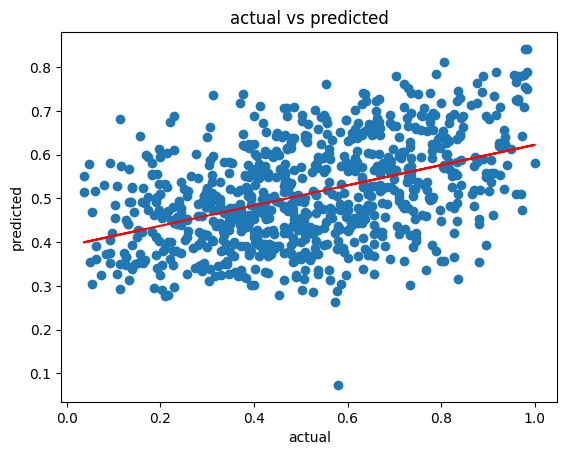

In [ ]:
df[['title','avg_movie_success', 'final combined prediction']]

plt.scatter(x = df['avg_movie_success'], y = df['final combined prediction'])

a, b = np.polyfit(df['avg_movie_success'], df['final combined prediction'], 1)
plt.plot(df['avg_movie_success'], a*df['avg_movie_success']+b, color = 'red')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
a

array([[<Axes: title={'center': 'final combined prediction'}>,
        <Axes: title={'center': 'avg_movie_success'}>]], dtype=object)

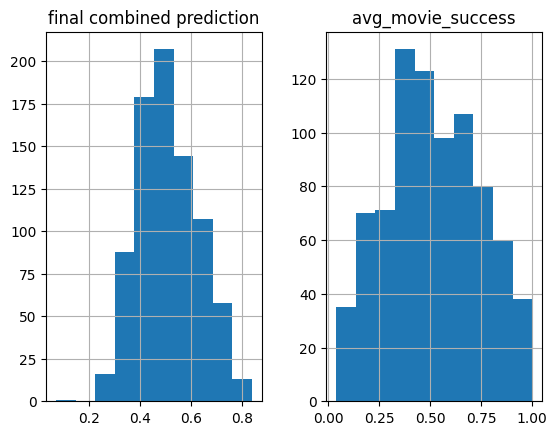

In [ ]:
df['avg_movie_success'] = round(df['avg_movie_success'],2)
df['final combined prediction'] = round(df['final combined prediction'],2)
df[['final combined prediction', 'avg_movie_success']].hist()

In [ ]:
df[movie_success_cols]

,success_movie_vote_average,success_movie_vote_count,success_lifetime_gross
0,0.73,1.00,0.01
1,0.90,0.99,1.00
2,0.90,0.89,0.63
3,0.59,0.88,0.80
4,0.55,0.95,0.98
...,...,...,...
816,0.73,0.12,0.19
817,0.30,0.09,0.11
818,0.34,0.21,0.36
819,0.84,0.34,0.06


In [ ]:
#trying random forests using https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df2 = df.dropna()
df2=df2[['title', 'book_author', 'book_rating', 'book_genres', 'book_pages',
       'book_awards', 'book_numRatings', 'book_ratingsByStars',
       'book_likedPercent', 'book_setting', 'book_num book awards','book_publish_date',
     'workcount','fan_count', 'author_workcount', 'author_fan_count',
     'success_book_numRatings', 'success_book_likedPercent',
       'success_book_num book awards','success_workcount', 'success_fan_count',
       'success_author_workcount', 'success_author_fan_count','avg_book_success',
       'avg_movie_success','book avg sig']]
features = pd.get_dummies(df2)
features= features.drop('book_publish_date', axis = 1)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,fan_count,author_workcount,author_fan_count,success_book_numRatings,success_book_likedPercent,success_book_num book awards,success_workcount,success_fan_count,success_author_workcount,success_author_fan_count,...,book_setting_['West Virginia (United States)'],"book_setting_['Westminster Palace, London, England (United Kingdom)', 'England']","book_setting_['Wilmington, North Carolina (United States)', 'North Carolina (United States)']","book_setting_['Wilmington, North Carolina (United States)']",book_setting_['Wisconsin (United States)'],"book_setting_['Worcestershire, England (United Kingdom)']","book_setting_['Wyoming (United States)', 'New Mexico (United States)', 'Washington, D.C. (United States)', 'Paris (France)']","book_setting_['Wyoming (United States)', 'Texas (United States)']",book_setting_['內蒙古 (China)'],book_setting_[]
0,81311.0,32.0,81311.0,0.01,0.93,0.01,0.31,0.94,0.30,0.94,...,0,0,0,0,0,0,0,0,0,0
1,209174.0,242.0,209174.0,1.00,1.00,0.97,0.88,0.97,0.88,0.97,...,0,0,0,0,0,0,0,0,0,0
2,33743.0,16.0,33743.0,0.99,0.93,1.00,0.16,0.91,0.15,0.91,...,0,0,0,0,0,0,0,0,0,0
3,19029.0,103.0,19029.0,0.98,0.72,0.71,0.66,0.85,0.64,0.83,...,0,0,0,0,0,0,0,0,0,1
4,81601.0,76.0,81601.0,0.99,0.24,0.97,0.58,0.94,0.56,0.94,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Labels are the values we want to predict
labels = np.array(features['avg_movie_success'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('avg_movie_success', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (591, 4004)
Training Labels Shape: (591,)
Testing Features Shape: (197, 4004)
Testing Labels Shape: (197,)


In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.15 degrees.


0.6177309401682388

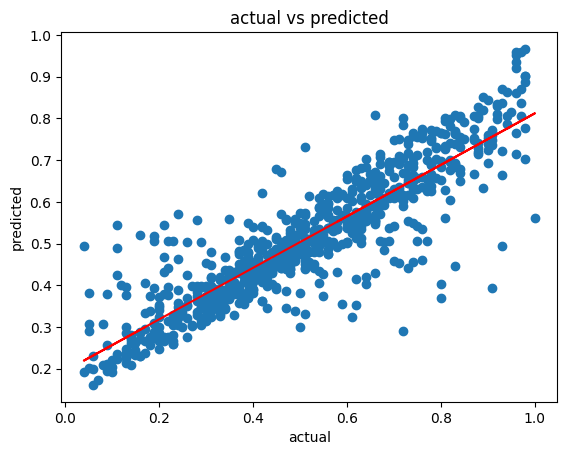

In [ ]:
all_predictions = rf.predict(features)

plt.scatter(x = df2['avg_movie_success'], y = all_predictions)

a, b = np.polyfit(df2['avg_movie_success'], all_predictions, 1)
plt.plot(df2['avg_movie_success'], a*df2['avg_movie_success']+b, color = 'red')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')
a

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: book_numRatings      Importance: 0.2
Variable: book_rating          Importance: 0.08
Variable: book avg sig         Importance: 0.06
Variable: success_book_numRatings Importance: 0.05
Variable: avg_book_success     Importance: 0.05
Variable: fan_count            Importance: 0.04
Variable: author_fan_count     Importance: 0.04
Variable: book_likedPercent    Importance: 0.02
Variable: workcount            Importance: 0.02
Variable: author_workcount     Importance: 0.02
Variable: success_book_likedPercent Importance: 0.02
Variable: success_workcount    Importance: 0.02
Variable: success_fan_count    Importance: 0.02
Variable: success_author_workcount Importance: 0.02
Variable: success_author_fan_count Importance: 0.02
Variable: book_num book awards Importance: 0.01
Variable: success_book_num book awards Importance: 0.01
Variable: book_awards_[]       Importance: 0.01
Variable: book_setting_[]      Importance: 0.01
Variable: title_101 Dalmatians Importance: 0.0
Variable: title_30